# Regression Group Project CO2 Emissions

<img src="https://images.propertycasualty360.com/contrib/content/uploads/sites/414/2022/04/Pollution-Solution-Image_0422-NU.jpg" alt="Pollution Solution" width="1000">


## Team Members
##### Khuthadzo Tshikovhele
##### Dembe Tsiwana
##### Keamogetswe Peterson
##### Aston Greeves

## Project Overview

## Loading Packages

In [25]:
## Loading Packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

## Data Collection and Description

In [26]:
data = pd.read_csv('co2_emissions_from_agri.csv')
data.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167,2593947,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490,2763167,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568,2985663,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090,3237009,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115,3482604,7733458.0,7722096.0,2500.768729,0.372250


In [27]:
# Display the first few rows of the dataframe
print("Initial data:")
print(data.head())

Initial data:
          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.8

In [28]:
# Display the column names of the dataframe
print("\nColumn names in the dataframe:")
print(data.columns)


Column names in the dataframe:
Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')


In [29]:
# Drop any rows with missing values
data_cleaned = data.dropna()

In [30]:
# Display the first few rows of the cleaned dataframe
print("\nData after dropping rows with missing values:")
print(data_cleaned.head())


Data after dropping rows with missing values:
       Area  Year  Savanna fires  Forest fires  Crop Residues  \
31  Albania  1990         5.5561        7.0253        59.2391   
32  Albania  1991         5.5561        7.0253        31.4625   
33  Albania  1992         5.5561        7.0253        29.9373   
34  Albania  1993         5.5561        7.0253        44.0550   
35  Albania  1994         5.5561        7.0253        42.4253   

    Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
31           23.5200                     110.5705                       2.0   
32            6.2720                     110.5705                       2.0   
33            1.8816                     110.5705                       2.0   
34            1.0976                     110.5705                       2.0   
35            0.0000                     110.5705                       3.0   

    Food Transport  Forestland  ...  Manure Management  \
31         46.9645     72.858

In [31]:
# Check if 'CO2_Emissions' is in the columns
if 'total_emission' in data_cleaned.columns:
    # Filter the data for a specific condition (e.g., CO2 emissions greater than a certain value)
    filtered_data = data_cleaned[data_cleaned['total_emission'] > 1000]
       
# Display the first few rows of the filtered dataframe
    print("\nFiltered data (total_emission > 1000):")
    print(filtered_data.head())

# Save the cleaned and filtered data to a new CSV file
    filtered_data.to_csv('cleaned_filtered_co2_emissions.csv', index=False)

    print("\nCleaned and filtered data saved to 'cleaned_filtered_co2_emissions.csv'")
else:
    print("\nColumn 'CO2_Emissions' not found in the dataframe. Please check the column names.")



Filtered data (total_emission > 1000):
       Area  Year  Savanna fires  Forest fires  Crop Residues  \
31  Albania  1990         5.5561        7.0253        59.2391   
32  Albania  1991         5.5561        7.0253        31.4625   
33  Albania  1992         5.5561        7.0253        29.9373   
34  Albania  1993         5.5561        7.0253        44.0550   
35  Albania  1994         5.5561        7.0253        42.4253   

    Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
31           23.5200                     110.5705                       2.0   
32            6.2720                     110.5705                       2.0   
33            1.8816                     110.5705                       2.0   
34            1.0976                     110.5705                       2.0   
35            0.0000                     110.5705                       3.0   

    Food Transport  Forestland  ...  Manure Management  \
31         46.9645     72.8581  ... 

**Handling Duplicate rows and removing them**

In [32]:
# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Display the first few rows of the dataframe after removing duplicates
print("\nData after removing duplicate rows:")
print(data_cleaned.head())


Data after removing duplicate rows:
       Area  Year  Savanna fires  Forest fires  Crop Residues  \
31  Albania  1990         5.5561        7.0253        59.2391   
32  Albania  1991         5.5561        7.0253        31.4625   
33  Albania  1992         5.5561        7.0253        29.9373   
34  Albania  1993         5.5561        7.0253        44.0550   
35  Albania  1994         5.5561        7.0253        42.4253   

    Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
31           23.5200                     110.5705                       2.0   
32            6.2720                     110.5705                       2.0   
33            1.8816                     110.5705                       2.0   
34            1.0976                     110.5705                       2.0   
35            0.0000                     110.5705                       3.0   

    Food Transport  Forestland  ...  Manure Management  \
31         46.9645     72.8581  ...    

In [33]:
# Convert data types if necessary (e.g., converting a column to numeric)
# Assuming 'Year' column exists and needs to be converted to integer
if 'Year' in data_cleaned.columns:
    data_cleaned['Year'] = pd.to_numeric(data_cleaned['Year'], errors='coerce')

In [34]:
# Display the data types of the dataframe
print("\nData types after conversion:")
print(data_cleaned.dtypes)


Data types after conversion:
Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils  

In [35]:
# Rename columns for consistency (e.g., converting column names to lowercase)
data_cleaned.columns = [col.lower() for col in data_cleaned.columns]

# Display the column names after renaming
print("\nColumn names after renaming:")
print(data_cleaned.columns)


Column names after renaming:
Index(['area', 'year', 'savanna fires', 'forest fires', 'crop residues',
       'rice cultivation', 'drained organic soils (co2)',
       'pesticides manufacturing', 'food transport', 'forestland',
       'net forest conversion', 'food household consumption', 'food retail',
       'on-farm electricity use', 'food packaging',
       'agrifood systems waste disposal', 'food processing',
       'fertilizers manufacturing', 'ippu', 'manure applied to soils',
       'manure left on pasture', 'manure management', 'fires in organic soils',
       'fires in humid tropical forests', 'on-farm energy use',
       'rural population', 'urban population', 'total population - male',
       'total population - female', 'total_emission',
       'average temperature °c'],
      dtype='object')


In [36]:
# Save the cleaned data to a new CSV file
data_cleaned.to_csv('cleaned_co2_emissions.csv', index=False)

print("\nCleaned data saved to 'cleaned_co2_emissions.csv'")


Cleaned data saved to 'cleaned_co2_emissions.csv'


**Handling Outliers**

In [37]:
# Select only numeric columns for outlier removal
numeric_data = data.select_dtypes(include=['number'])

# Remove outliers using the IQR method
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
data_no_outliers = numeric_data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the first few rows of the dataframe after removing outliers
print("\nData after removing outliers:")
print(data_no_outliers.head())

# Save the cleaned data to a new CSV file
data_no_outliers.to_csv('data_no_outliers.csv', index=False)

print("\nData without outliers saved to 'data_no_outliers.csv'")


Data after removing outliers:
   Year  Savanna fires  Forest fires  Crop Residues  Rice Cultivation  \
0  1990        14.7237        0.0557       205.6077            686.00   
1  1991        14.7237        0.0557       209.4971            678.16   
2  1992        14.7237        0.0557       196.5341            686.00   
3  1993        14.7237        0.0557       230.8175            686.00   
4  1994        14.7237        0.0557       242.0494            705.60   

   Drained organic soils (CO2)  Pesticides Manufacturing  Food Transport  \
0                          0.0                 11.807483         63.1152   
1                          0.0                 11.712073         61.2125   
2                          0.0                 11.712073         53.3170   
3                          0.0                 11.712073         54.3617   
4                          0.0                 11.712073         53.9874   

   Forestland  Net Forest conversion  ...  Manure Management  \
0   -2388

**Inputing Missing Values**

In [38]:
# Fill missing values with the mean of the numeric columns
data_filled = data.fillna(data.mean(numeric_only=True))

# Display the first few rows of the dataframe after filling missing values
print("\nData after filling missing values with mean:")
print(data_filled.head())


Data after filling missing values with mean:
          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soil

**Normalizing the data**

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data provided by the user
data_dict = {
    "Area": ["Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan"],
    "Year": [1990, 1991, 1992, 1993, 1994],
    "Savanna fires": [14.7237, 14.7237, 14.7237, 14.7237, 14.7237],
    "Forest fires": [0.0557, 0.0557, 0.0557, 0.0557, 0.0557],
    "Crop Residues": [205.6077, 209.4971, 196.5341, 230.8175, 242.0494],
    "Rice Cultivation": [686.00, 678.16, 686.00, 686.00, 705.60],
    "Drained organic soils (CO2)": [0.0, 0.0, 0.0, 0.0, 0.0],
    "Pesticides Manufacturing": [11.807483, 11.712073, 11.712073, 11.712073, 11.712073],
    "Food Transport": [63.1152, 61.2125, 53.3170, 54.3617, 53.9874],
    "Forestland": [-2388.803, -2388.803, -2388.803, -2388.803, -2388.803],
    "Manure Management": [319.1763, 342.3079, 349.1224, 352.2947, 367.6784],
    "Fires in organic soils": [0.0, 0.0, 0.0, 0.0, 0.0],
    "Fires in humid tropical forests": [0.0, 0.0, 0.0, 0.0, 0.0],
    "On-farm energy use": [None] * 5,
    "Rural population": [9655167, 10230490, 10995568, 11858090, 12690115],
    "Urban population": [2593947, 2763167, 2985663, 3237009, 3482604],
    "Total Population - Male": [5348387.0, 5372959.0, 6028494.0, 7003641.0, 7733458.0],
    "Total Population - Female": [5346409.0, 5372208.0, 6028939.0, 7000119.0, 7722096.0],
    "total_emission": [2198.963539, 2323.876629, 2356.304229, 2368.470529, 2500.768729],
    "Average Temperature °C": [0.536167, 0.020667, -0.259583, 0.101917, 0.372250]
}

# Create DataFrame
data = pd.DataFrame(data_dict)

# Display the initial data
print("Initial data:")
print(data.head())

# Fill missing values with the mean of the numeric columns
data_filled = data.fillna(data.mean(numeric_only=True))

# Normalize the numeric columns
numeric_columns = data_filled.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_filled[numeric_columns]), columns=numeric_columns)

# Combine the normalized numeric columns with the non-numeric columns
data_normalized = pd.concat([data_filled.select_dtypes(exclude=['float64', 'int64']).reset_index(drop=True), data_normalized], axis=1)

# Display the first few rows of the normalized dataframe
print("\nNormalized data:")
print(data_normalized.head())


Initial data:
          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803   

## Exploratory Data Analysis

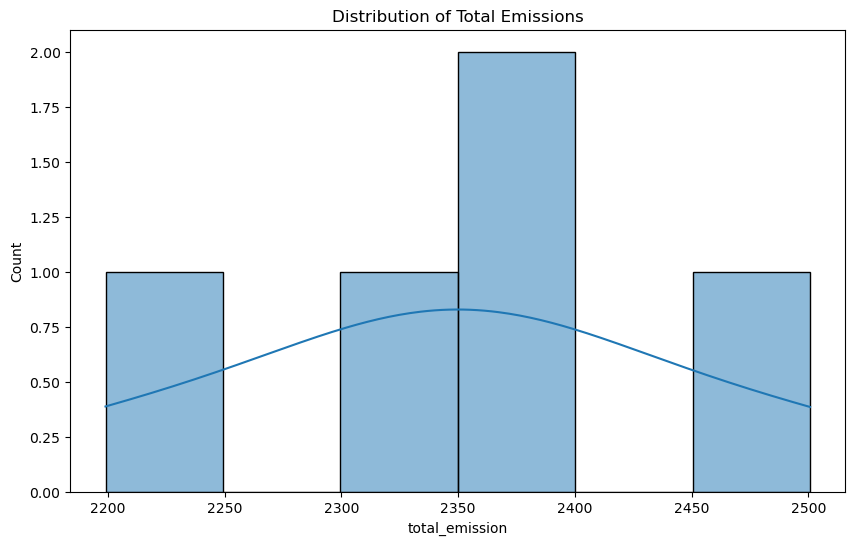

In [40]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['total_emission'], kde=True)
plt.title('Distribution of Total Emissions')
plt.show()

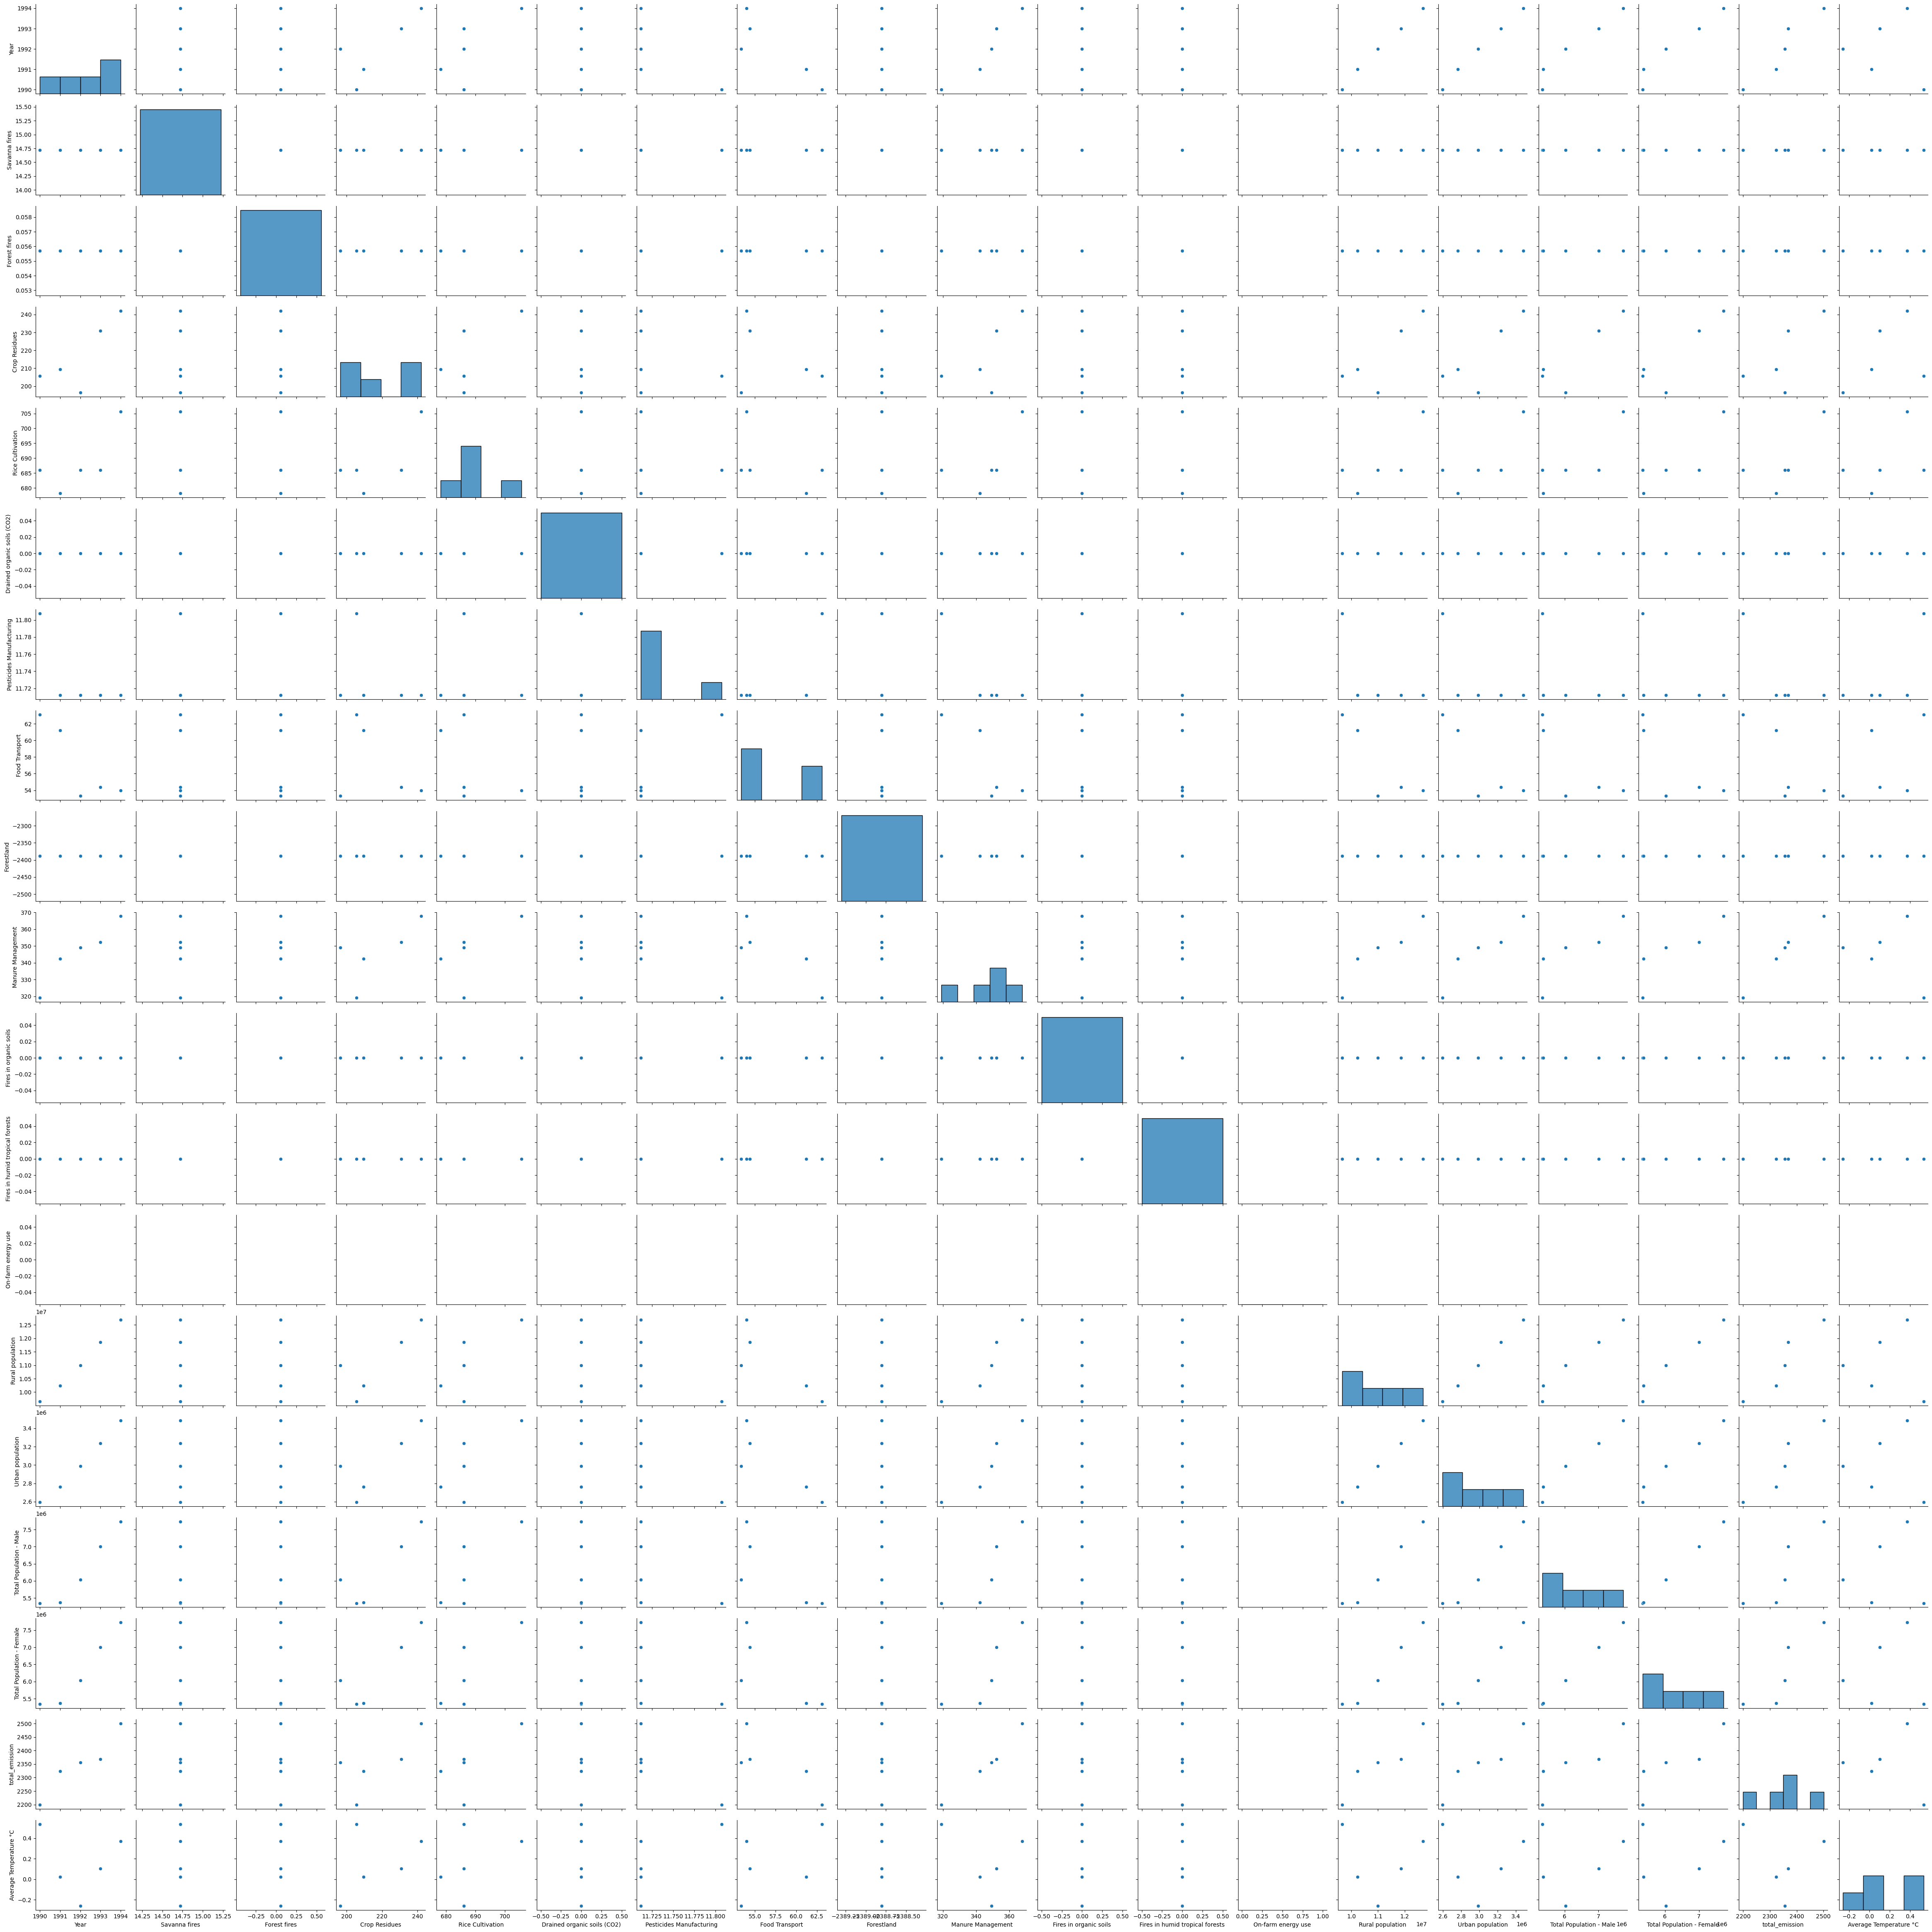

In [41]:
# Pairplot
sns.pairplot(data)
plt.show()

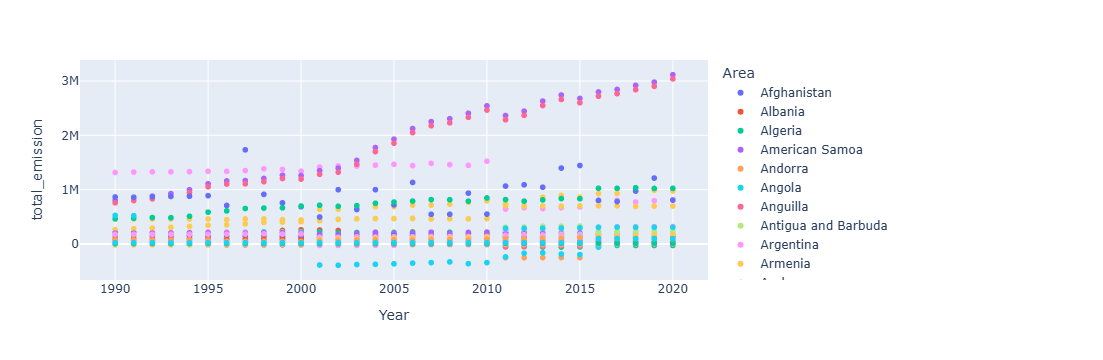

In [42]:
# Import Plotly Express
import plotly.express as px

# Load the data
data = pd.read_csv('co2_emissions_from_agri.csv')

# Scatter plot
fig = px.scatter(data, x='Year', y='total_emission', color='Area')
fig.show()

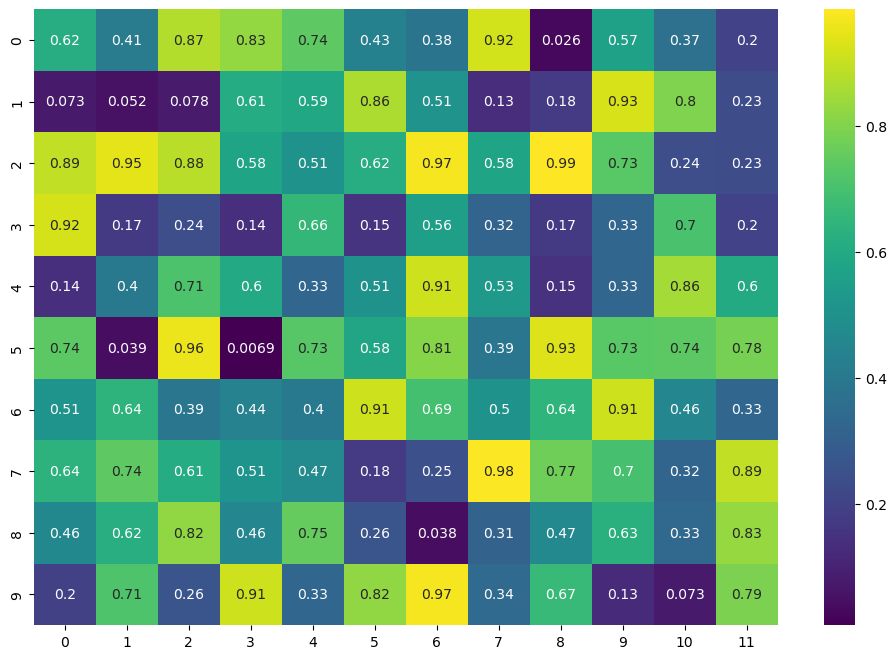

In [19]:
# Load the data
data = pd.read_csv('co2_emissions_from_agri.csv')

# Generate some data
data = np.random.rand(10, 12)

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
sns.heatmap(data, annot=True, cmap='viridis')

# Display the heatmap
plt.show()


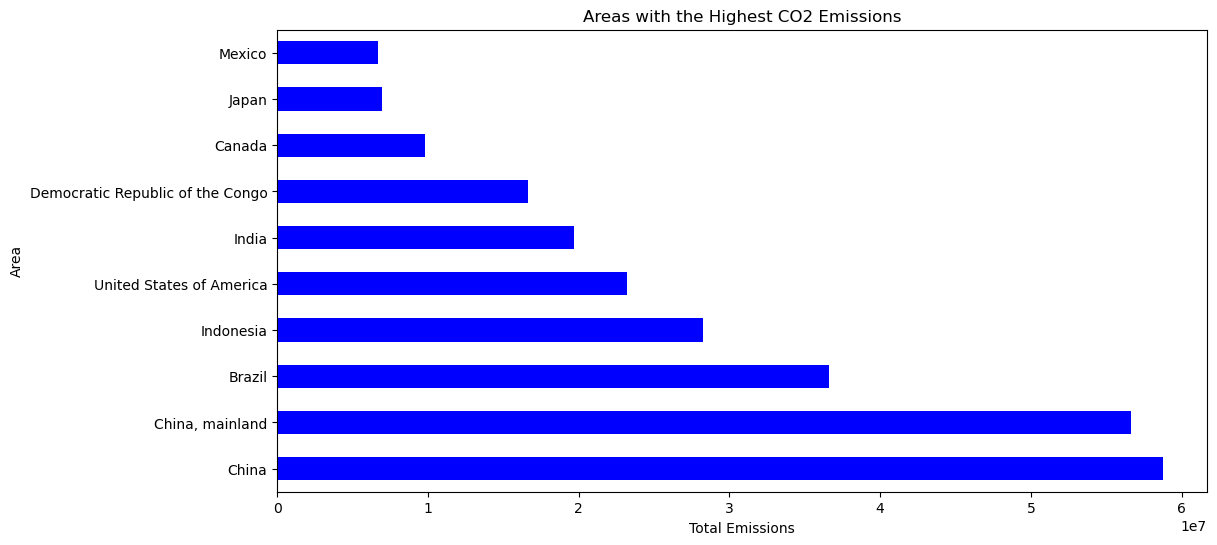

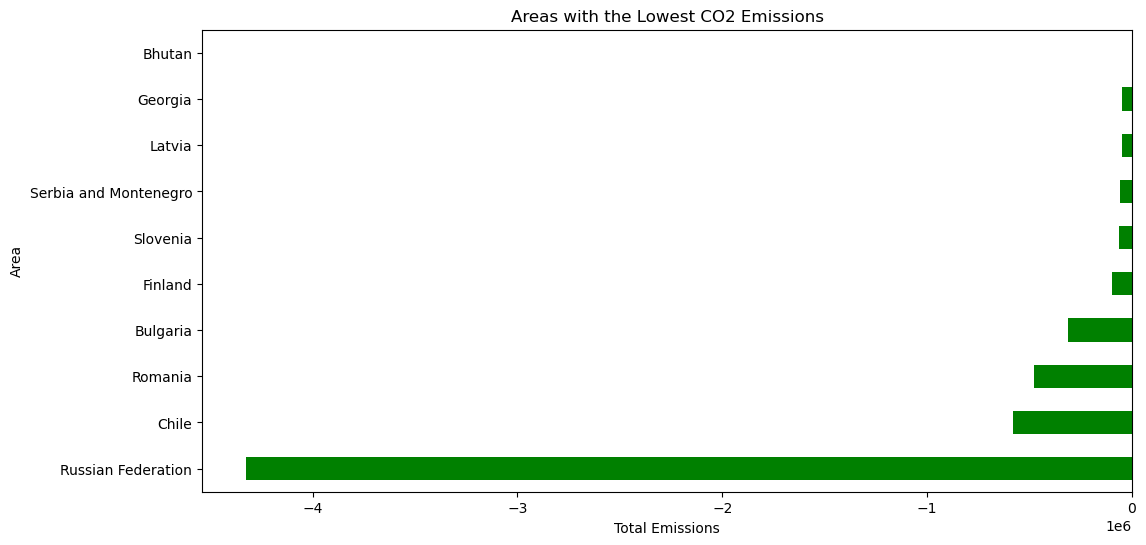

In [43]:
# Load the data
data = pd.read_csv('co2_emissions_from_agri.csv')

# Group the data by 'Area' and calculate the total emissions for each area
total_emissions_by_area = data.groupby('Area')['total_emission'].sum()

# Get the top 10 and bottom 10 areas with the highest and lowest emissions
top10_emissions_areas = total_emissions_by_area.nlargest(10)
bottom10_emissions_areas = total_emissions_by_area.nsmallest(10)

# Plot the top 10 areas with the highest emissions as a horizontal bar graph
plt.figure(figsize=(12, 6))
top10_emissions_areas.plot(kind='barh', color='blue')
plt.title('Areas with the Highest CO2 Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Area')
plt.show()

# Plot the bottom 10 areas with the lowest emissions as a horizontal bar graph
plt.figure(figsize=(12, 6))
bottom10_emissions_areas.plot(kind='barh', color='green')
plt.title('Areas with the Lowest CO2 Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Area')
plt.show()

## Feature Engineering

In [44]:
# Load the dataset
df = pd.read_csv('co2_emissions_from_agri.csv')

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

# One-hot encode the 'Area' column
encoder = OneHotEncoder(sparse=False)
encoded_area = encoder.fit_transform(df[['Area']])

# Create a DataFrame with the encoded 'Area' column
encoded_area_df = pd.DataFrame(encoded_area, columns=encoder.get_feature_names_out(['Area']))

# Concatenate the encoded 'Area' DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(columns=['Area']), encoded_area_df], axis=1)

# Ensure all columns are numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Display the first few rows of the encoded dataframe
print(df_encoded.head())

          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...       

TypeError: Could not convert ["AfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAmerican SamoaAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaAntigua and BarbudaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgium-LuxembourgBelgium-LuxembourgBelgium-LuxembourgBelgium-LuxembourgBelgium-LuxembourgBelgium-LuxembourgBelgium-LuxembourgBelgium-LuxembourgBelgium-LuxembourgBelgium-LuxembourgBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBritish Virgin IslandsBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBrunei DarussalamBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurkina FasoBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCabo VerdeCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCayman IslandsCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicCentral African RepublicChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChannel IslandsChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Hong Kong SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, Macao SARChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, mainlandChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofChina, Taiwan Province ofColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCook IslandsCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCosta RicaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechoslovakiaCzechoslovakiaCzechoslovakiaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic People's Republic of KoreaDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDemocratic Republic of the CongoDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicDominican RepublicEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEl SalvadorEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEquatorial GuineaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopia PDREthiopia PDREthiopia PDRFalkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Falkland Islands (Malvinas)Faroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFaroe IslandsFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaFrench PolynesiaGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGibraltarGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuadeloupeGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuamGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuinea-BissauGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHoly SeeHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)IraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsle of ManIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLao People's Democratic RepublicLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMarshall IslandsMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMartiniqueMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMayotteMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMicronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)MonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMonacoMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNetherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands (Kingdom of the)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)Netherlands Antilles (former)New CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew CaledoniaNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNew ZealandNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorthern Mariana IslandsNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanPacific Islands Trust TerritoryPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePalestinePanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaPapua New GuineaParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoPuerto RicoQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of KoreaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRepublic of MoldovaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRussian FederationRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Helena, Ascension and Tristan da CunhaSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint Kitts and NevisSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint LuciaSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Pierre and MiquelonSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSaint Vincent and the GrenadinesSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSan MarinoSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSao Tome and PrincipeSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSaudi ArabiaSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSerbia and MontenegroSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSierra LeoneSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSolomon IslandsSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth AfricaSouth SudanSouth SudanSouth SudanSouth SudanSouth SudanSouth SudanSouth SudanSouth SudanSouth SudanSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSri LankaSudanSudanSudanSudanSudanSudanSudanSudanSudanSudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)Sudan (former)SurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicSyrian Arab RepublicTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTimor-LesteTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTokelauTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTrinidad and TobagoTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTurks and Caicos IslandsTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Arab EmiratesUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited Republic of TanzaniaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUnited States Virgin IslandsUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUSSRUSSRUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVenezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)Viet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamViet NamWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWallis and Futuna IslandsWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaWestern SaharaYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYugoslav SFRYugoslav SFRZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabwe"] to numeric

## Model Testing

##### 1. Linear Regression Testing

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming data is your DataFrame
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_encoded)

# Convert the imputed data back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data_encoded.columns)

# Define features and target variable
X = data_imputed.drop(columns=['total_emission'])
y = data_imputed['total_emission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 125919.21033475755
R-squared: 0.9999981796625802


The results of your regression model evaluation indicate the following:

Mean Squared Error (MSE): 125919.21

The MSE is relatively high, suggesting that the model's predictions have some error, but this needs to be interpreted in the context of your data's scale.

R-squared (R²): 0.999998

This metric indicates how well the model's predictions match the actual data. An R² value close to 1 means that the model explains almost all the variability in the target variable. R² value of 0.999998 is extremely high, indicating that the model fits the data very well.

In summary, while the MSE suggests there is some error in the predictions, the very high R² value indicates that the model is highly accurate in explaining the variance in the target variable.

##### 2. Cross-Validation Testing

In [47]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming data is your DataFrame
# Separate features and target variable
X = data.drop(columns=['total_emission'])
y = data['total_emission']

# Define a preprocessing pipeline for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and the regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean Squared Error (cross-validated): {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")


Mean Squared Error (cross-validated): 44822329.39101496
Standard Deviation of MSE: 2617200.0890397513


The output of your K-Fold cross-validation provides insights into the performance and stability of your regression model:

Mean Squared Error (cross-validated): 44,822,329.39

This value represents the average squared difference between the actual and predicted values across all cross-validation folds. A higher MSE indicates larger errors in the model's predictions. In your case, the MSE is quite large, suggesting that the model's predictions have significant errors. This could be due to various factors such as the scale of the target variable or potential issues with the model or data.
Standard Deviation of MSE: 2,617,200.09

This value measures the variability of the MSE scores across the different cross-validation folds. A lower standard deviation indicates that the model's performance is more consistent across different subsets of the data. In your case, the standard deviation is relatively low compared to the mean MSE, suggesting that while the model's errors are large, its performance is relatively stable across different folds.
In summary, while the model's average error is quite high, the relatively low standard deviation indicates that the model's performance is consistent.

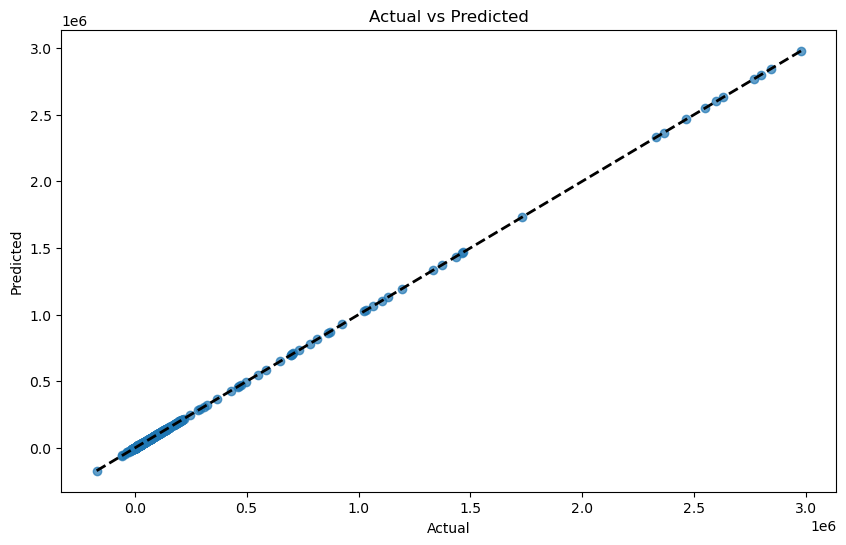

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Scatter Plot of Actual vs. Predicted Values
Purpose: To compare the actual values with the predicted values.
Interpretation:
Points close to the diagonal line indicate good predictions.
Points far from the line indicate errors.
A tight cluster around the line suggests a well-performing model.
If the points are randomly scattered around the line, it indicates that the model is capturing the underlying pattern well.

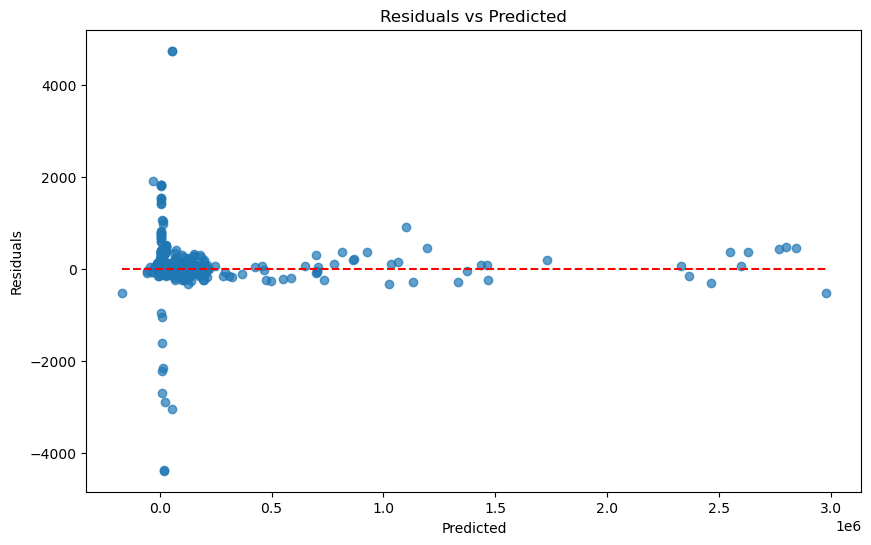

In [49]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

Residual Plot
Purpose: To visualize the residuals (errors) of the predictions.
Interpretation:
Residuals should be randomly distributed around zero.
A random pattern suggests that the model's assumptions are valid.
Patterns or trends in the residuals (e.g., a funnel shape) may indicate issues like heteroscedasticity or non-linearity.
Large residuals indicate points where the model's predictions are significantly off.

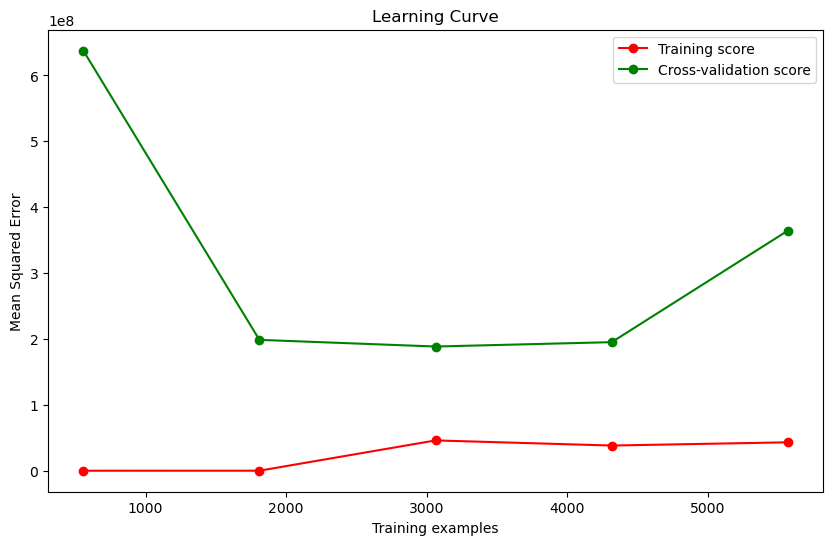

In [50]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

The above visualization is a leaning Curve
Purpose: To evaluate the model's performance as a function of the training set size.
Interpretation:
Training Score: The model's performance on the training data.
Validation Score: The model's performance on the validation data.
Overfitting: If the training score is high and the validation score is low, the model is overfitting.
Underfitting: If both the training and validation scores are low, the model is underfitting.
Good Fit: If both scores are high and close to each other, the model is well-fitted.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming data is your DataFrame
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_encoded)

# Convert the imputed data back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data_encoded.columns)

# Define features and target variable
X = data_imputed.drop(columns=['total_emission'])
y = data_imputed['total_emission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f"Decision Tree - Mean Squared Error: {dt_mse}")
print(f"Decision Tree - R-squared: {dt_r2}")

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R-squared: {rf_r2}")


Decision Tree - Mean Squared Error: 783725802.2135843
Decision Tree - R-squared: 0.9886701528634456
Random Forest - Mean Squared Error: 634854371.4054929
Random Forest - R-squared: 0.9908222965714769


Mean Squared Error (MSE):

This metric measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit of the model to the data.
For the Decision Tree, the MSE is 783,725,802.21.
For the Random Forest, the MSE is 634,854,371.41.
The Random Forest has a lower MSE, indicating it has a better fit to the data compared to the Decision Tree.

R-squared (R²):

This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit.
For the Decision Tree, the R² is 0.9887.
For the Random Forest, the R² is 0.9908.
Both models have high R² values, indicating they explain a large portion of the variance in the target variable. The Random Forest has a slightly higher R², suggesting it performs better overall.
In summary, both models perform well, but the Random Forest model has a slight edge over the Decision Tree in terms of both MSE and R². This is expected as Random Forests are generally more robust and less prone to overfitting compared to single Decision Trees.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming data is your DataFrame
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_encoded)

# Convert the imputed data back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data_encoded.columns)

# Define features and target variable
X = data_imputed.drop(columns=['total_emission'])
y = data_imputed['total_emission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Regressor model
svr_model = SVR()
# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_y_pred = svr_model.predict(X_test)

# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print(f"Support Vector Regressor - Mean Squared Error: {svr_mse}")
print(f"Support Vector Regressor - R-squared: {svr_r2}")


Support Vector Regressor - Mean Squared Error: 72534451068.72743
Support Vector Regressor - R-squared: -0.048586432169815286
